In [1]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nodes = json.load(open('./node_list.json', 'rb'))
edges = json.load(open('./edge_list.json', 'rb'))

In [3]:
DG = nx.DiGraph()

In [4]:
[DG.add_node(n['id'], nation=n['nation']) for n in nodes];
# [n["nation"] for n in nodes]
# DG.nodes()

In [5]:
[DG.add_edge(edge['from'], edge['to'], type=edge['type']) for edge in edges];
# DG.edges()

In [6]:
unique_nations = set(n["nation"] for n in nodes if n["nation"] != "NA")
colors = ['#aff8db', '#ffcbc1', '#d5aaff', '#ace7ff']
nation_colors = {}

for idx, nation in enumerate(unique_nations):
    nation_colors[nation] = colors[idx % len(colors)]


for nation, color in nation_colors.items():
  # print(f"Nation: {nation}, Color: {color}")
  pass

nation_colors

{'Inazuma': '#aff8db',
 'Mondstadt': '#ffcbc1',
 'Snezhnaya': '#d5aaff',
 'Liyue': '#ace7ff'}

In [7]:
node_colours = [nation_colors[n[1]['nation']] if n[1]['nation']in nation_colors.keys() else '#d1d1d1' for n in list(DG.nodes(data=True)) ]

In [8]:
pos = nx.spring_layout(DG, k=0.25, iterations=25)

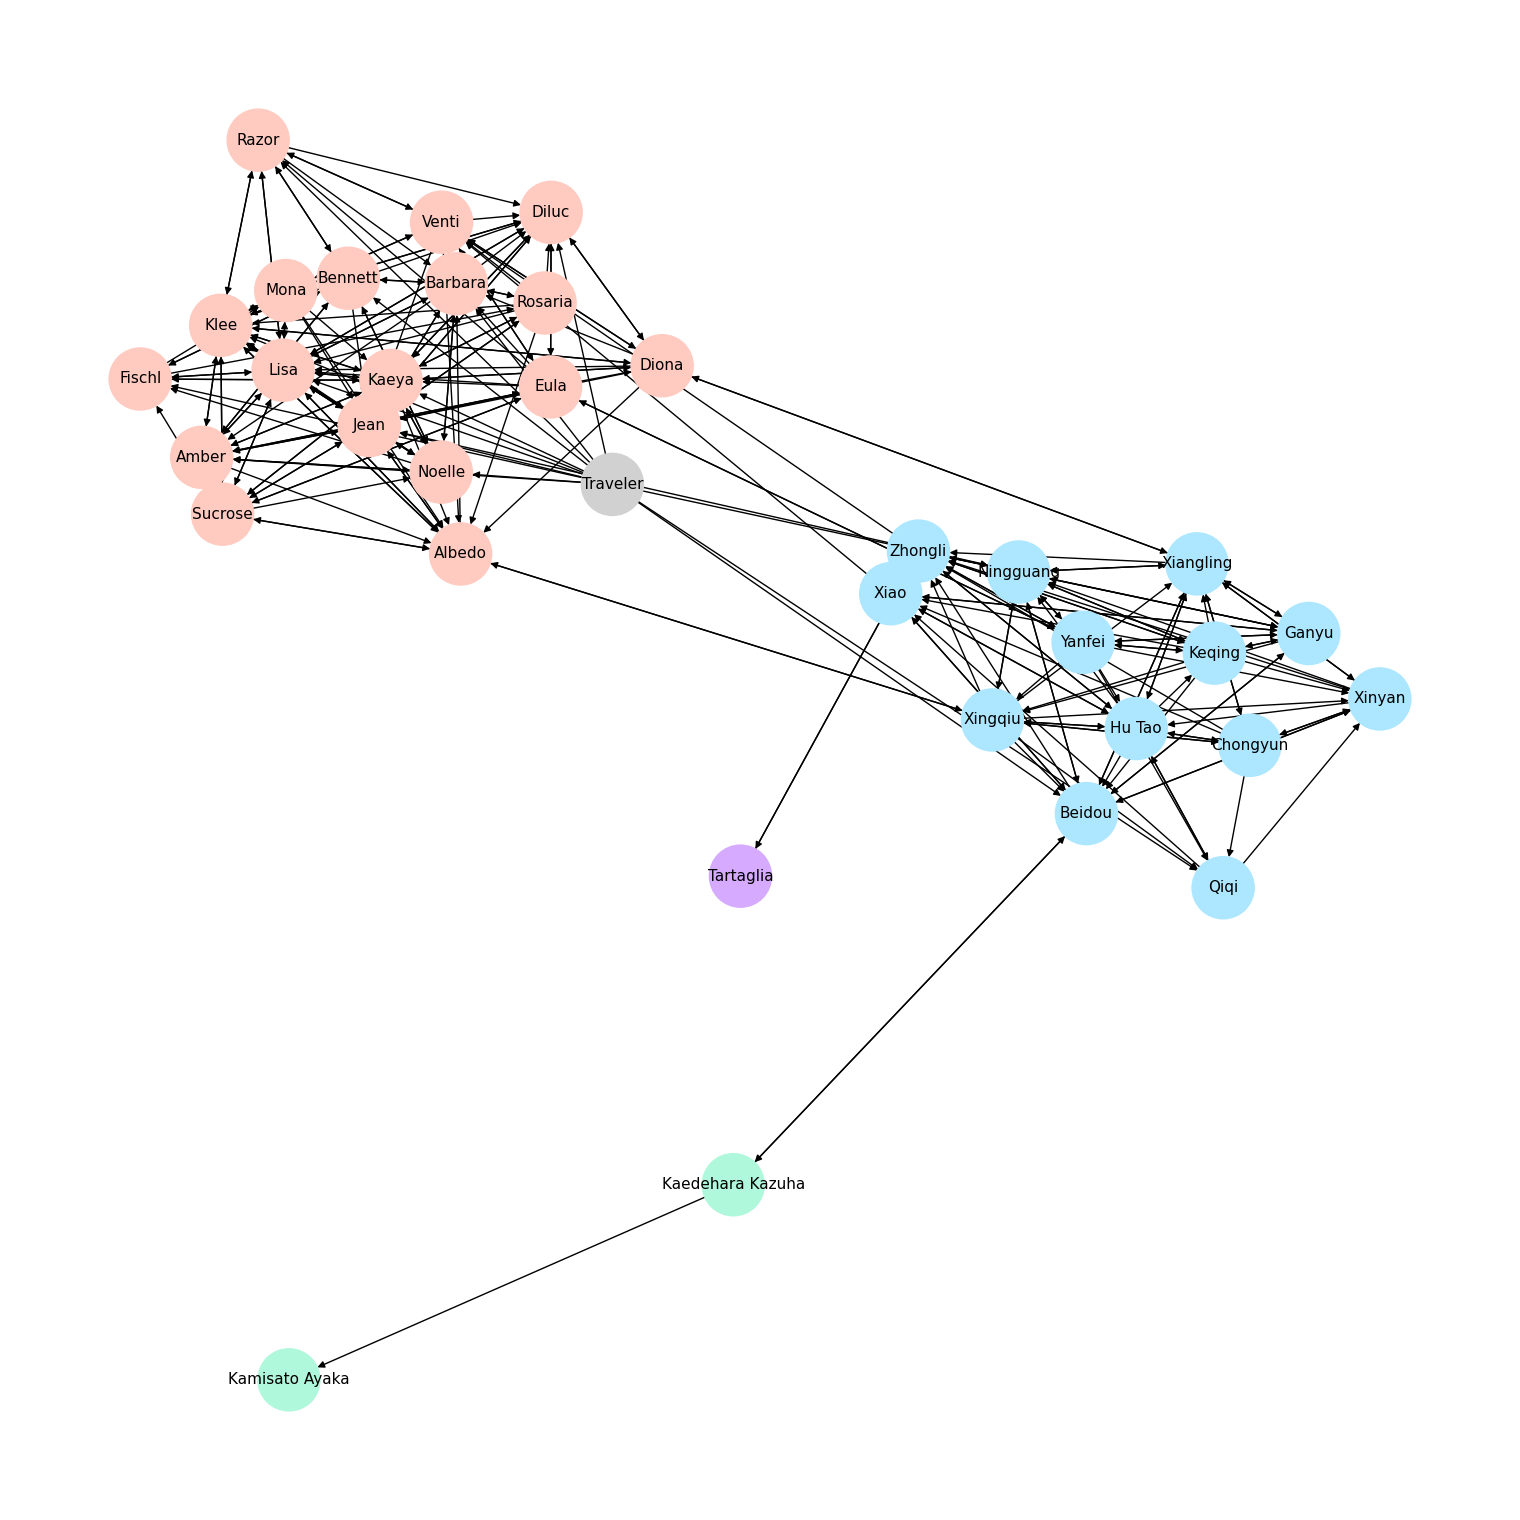

In [9]:
plt.figure(1,figsize=(15,15))
nx.draw(DG,
        nodelist=DG.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colours,
        with_labels=True,
        font_size = 11,
        font_color='black')

plt.savefig('directed.png') # save
plt.show()

# Studying popularity

In [10]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: DG.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(10)

,id,nation,in_degree
34,Jean,Mondstadt,17
24,Lisa,Mondstadt,15
5,Kaeya,Mondstadt,13
6,Klee,Mondstadt,13
10,Diluc,Mondstadt,12
19,Barbara,Mondstadt,11
4,Zhongli,Liyue,11
16,Albedo,Mondstadt,11
15,Beidou,Liyue,10
12,Ningguang,Liyue,10


**Sorted by popularity : Jean being the most popular**

In [34]:
# from matplotlib import pyplot as plt
# _df_0['in_degree'].plot(kind='hist', bins=20, title='in_degree')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
dir_nodes_df['in_degree'].mean()

7.485714285714286

In [12]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: DG.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(10)

,id,nation,in_degree,out_degree
25,Traveler,NA,0,14
24,Lisa,Mondstadt,15,12
34,Jean,Mondstadt,17,11
5,Kaeya,Mondstadt,13,11
6,Klee,Mondstadt,13,11
14,Eula,Mondstadt,6,11
1,Keqing,Liyue,5,9
29,Diona,Mondstadt,6,9
8,Yanfei,Liyue,5,9
22,Hu Tao,Liyue,8,9


In [35]:
# from matplotlib import pyplot as plt
# _df_5['out_degree'].plot(kind='hist', bins=20, title='out_degree')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
dir_nodes_df['out_degree'].mean()

7.485714285714286

<ipython-input-15-5b097036a1fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
<ipython-input-15-5b097036a1fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])


<Axes: xlabel='out_degree', ylabel='count'>

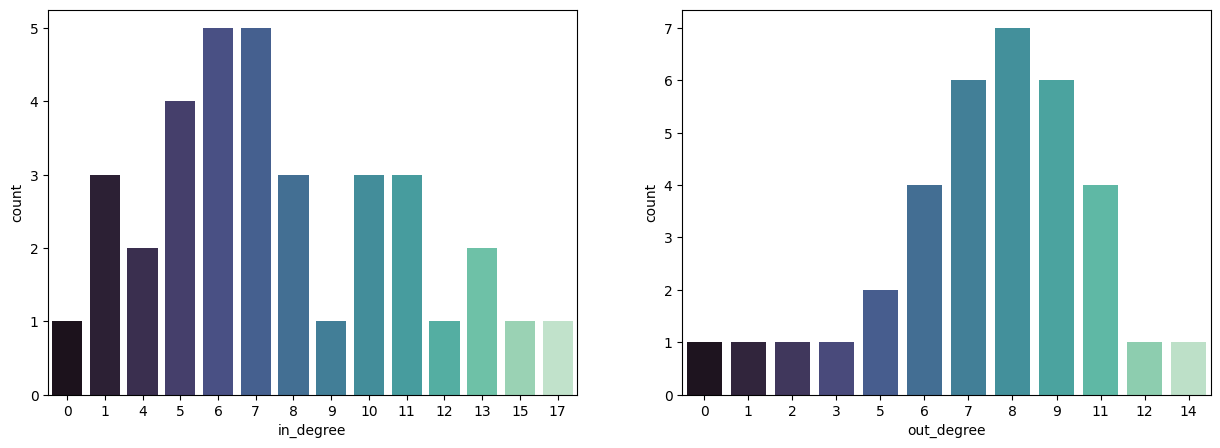

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])

In [16]:
# calculate page rank centrality (most important of the nodes = higher score)
# trying to guess characters who know important characters
pr = nx.pagerank(DG)

dir_nodes_df['page_rank'] = dir_nodes_df['id'].apply(lambda n: pr[n])
dir_nodes_df[['id', 'nation', 'page_rank']].sort_values('page_rank', ascending=False).head(10)

,id,nation,page_rank
34,Jean,Mondstadt,0.061477
24,Lisa,Mondstadt,0.055283
6,Klee,Mondstadt,0.046893
5,Kaeya,Mondstadt,0.046560
4,Zhongli,Liyue,0.042101
10,Diluc,Mondstadt,0.040697
16,Albedo,Mondstadt,0.040236
19,Barbara,Mondstadt,0.039043
17,Amber,Mondstadt,0.036527
15,Beidou,Liyue,0.033857


Above, we find characeters who know 'celebrities'

In [17]:
G = DG.to_undirected(reciprocal=True)
# mutual connections only


In [18]:
pos = nx.spring_layout(G, k=0.25, iterations=25)
node_colours = [nation_colors[n[1]['nation']] if n[1]['nation']in nation_colors.keys() else '#d1d1d1' for n in list(G.nodes(data=True)) ]


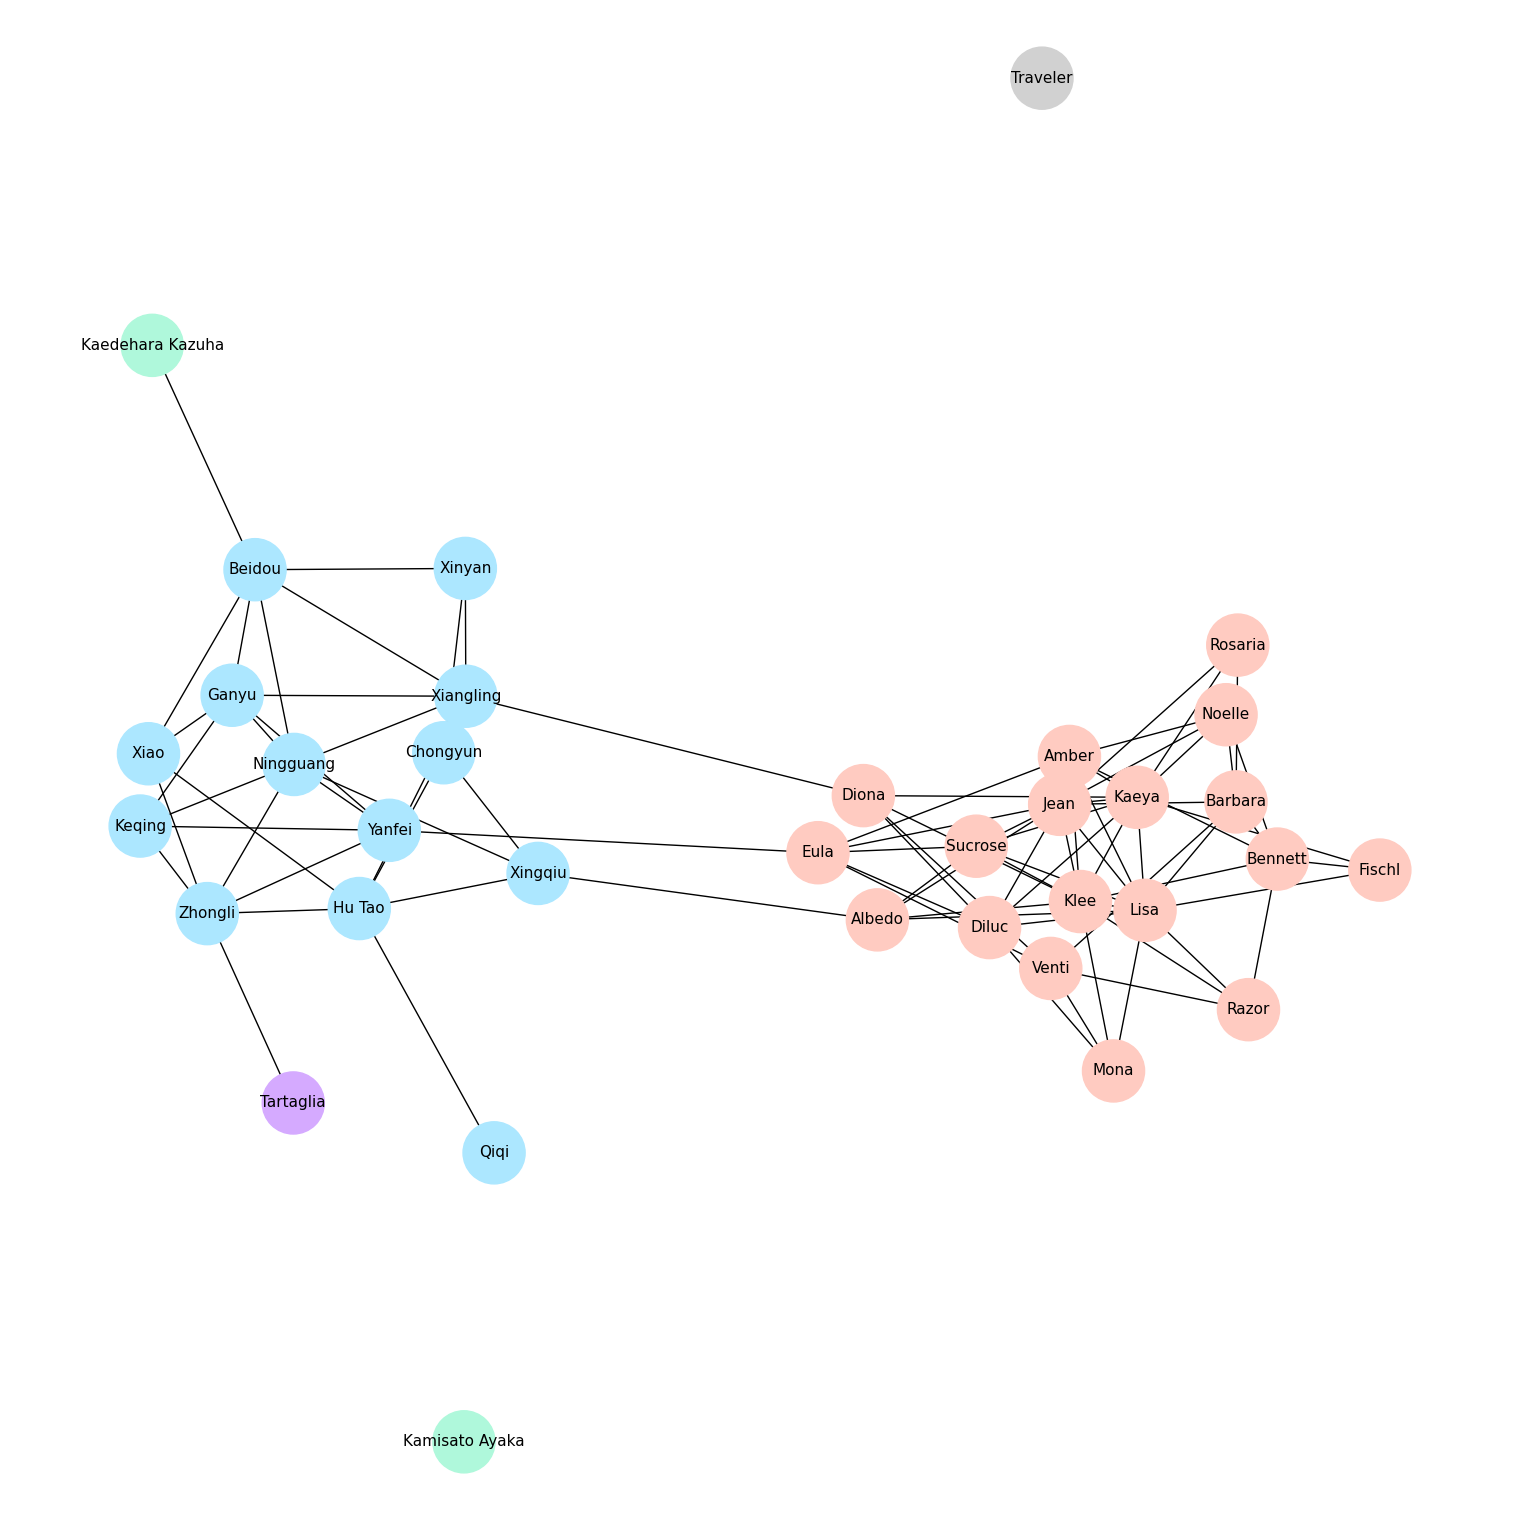

In [19]:
plt.figure(1,figsize=(15,15))
nx.draw(G,
        nodelist=G.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colours,
        with_labels=True,
        font_size = 11,
        font_color='black')

# plt.savefig("undirected.png", format="PNG")
plt.show()

In [20]:
# weirdly, traveler has no INs
# we gotta remove isolated nodes

In [21]:
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

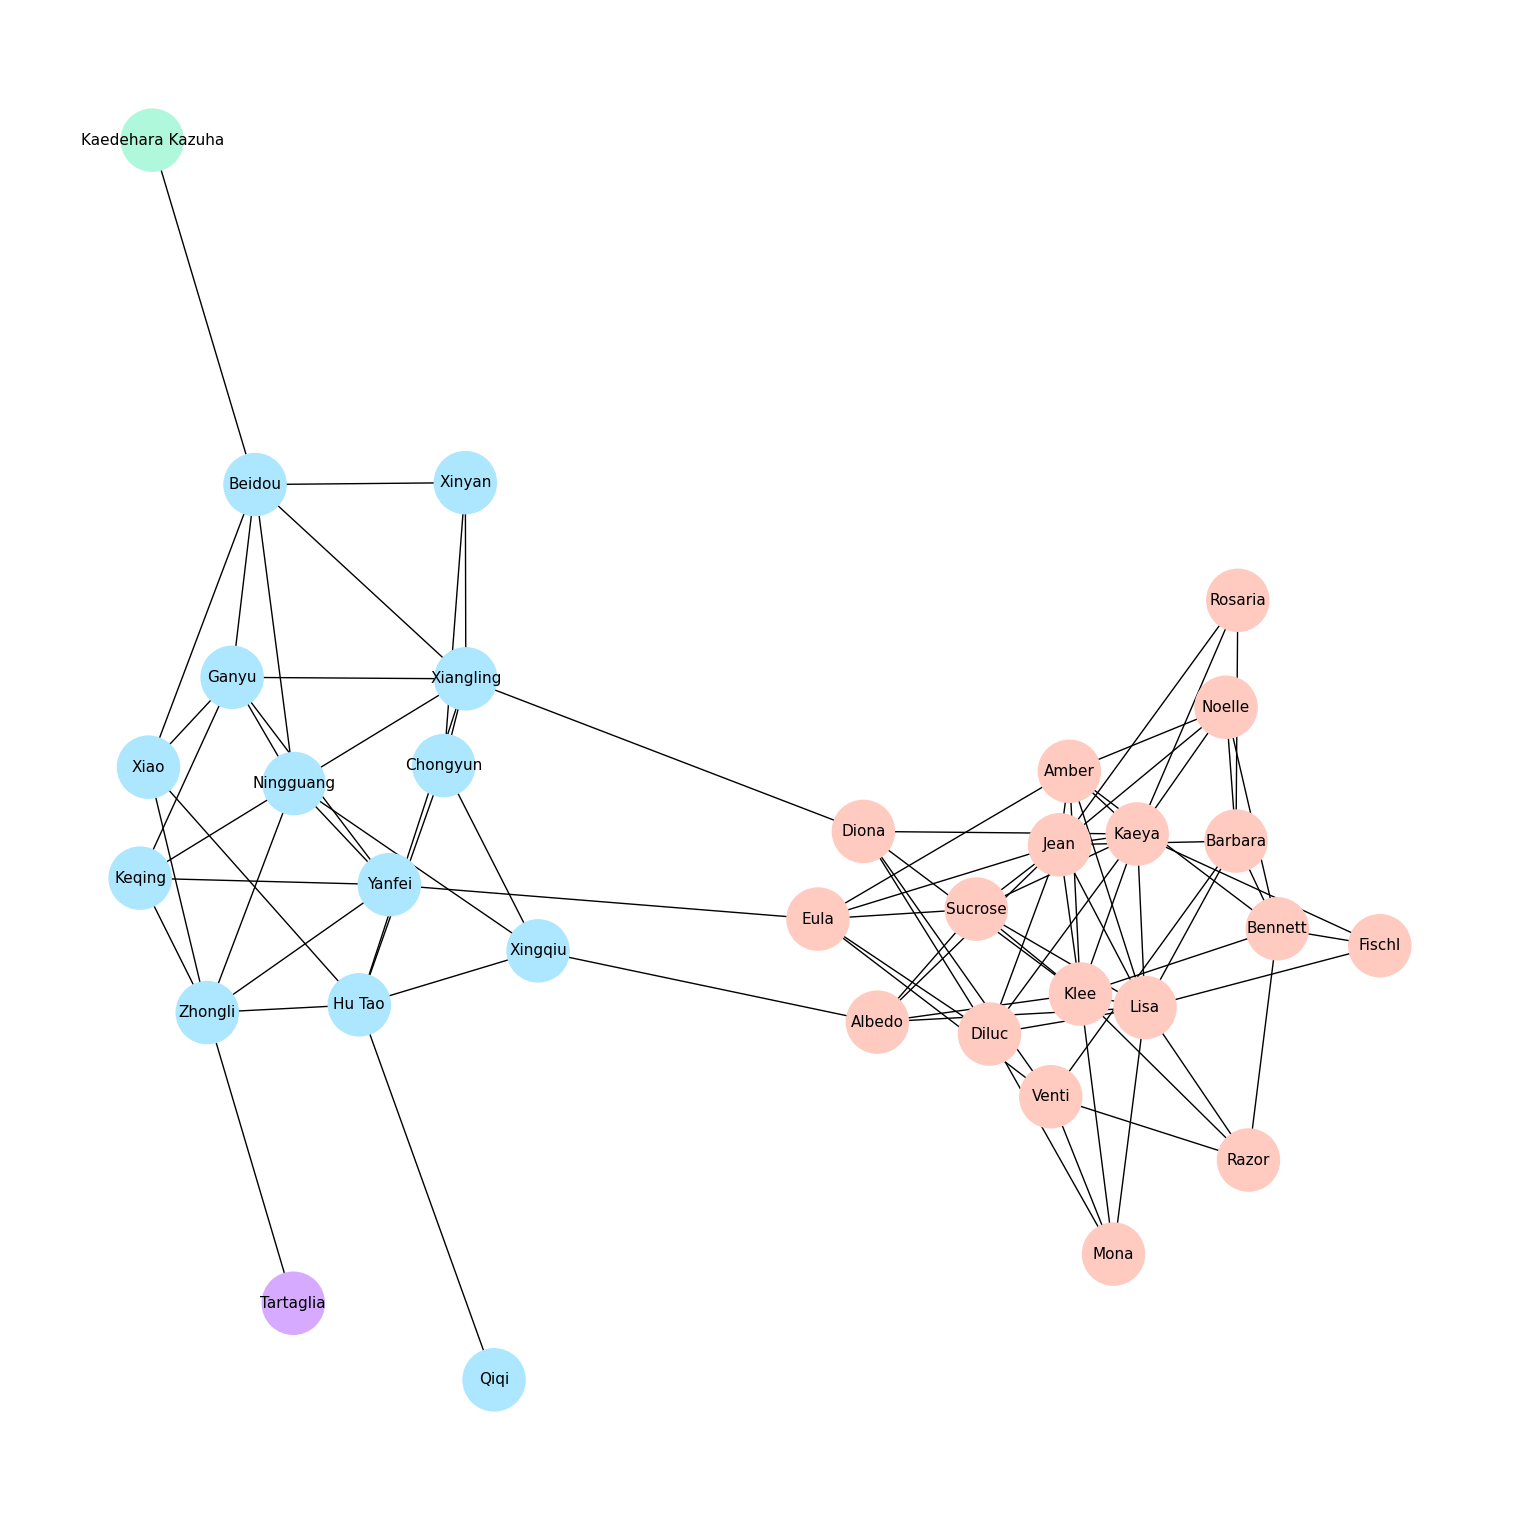

In [22]:
node_colours = [nation_colors[n[1]['nation']] if n[1]['nation']in nation_colors.keys() else '#d1d1d1' for n in list(G.nodes(data=True)) ]
plt.figure(1,figsize=(15,15))
nx.draw(G, pos=pos, node_size=2000, node_color=node_colours, with_labels=True, font_size=11)

# Character Importance in the Network

In [25]:
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolated)]
undir_df

,id,nation
0,Xinyan,Liyue
1,Keqing,Liyue
2,Bennett,Mondstadt
3,Xiangling,Liyue
4,Zhongli,Liyue
5,Kaeya,Mondstadt
6,Klee,Mondstadt
7,Mona,Mondstadt
8,Yanfei,Liyue
9,Chongyun,Liyue


In [26]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(G.edges(n)))
undir_df.sort_values('degree', ascending=False).head(10)

,id,nation,degree
34,Jean,Mondstadt,11
24,Lisa,Mondstadt,11
5,Kaeya,Mondstadt,10
6,Klee,Mondstadt,10
12,Ningguang,Liyue,7
17,Amber,Mondstadt,7
3,Xiangling,Liyue,7
4,Zhongli,Liyue,6
15,Beidou,Liyue,6
2,Bennett,Mondstadt,6


Above are characters and how many characters , they are related to directly (degree)

# Closeness Centrality


In [29]:
close_cen = nx.closeness_centrality(G)
undir_df['closeness'] = undir_df['id'].apply(lambda n: close_cen[n])
# a character and the connection to how many characters via the shortest path
# undir_df
undir_df.sort_values('closeness', ascending=False).head(10)


,id,nation,degree,closeness
29,Diona,Mondstadt,5,0.470588
3,Xiangling,Liyue,7,0.450704
34,Jean,Mondstadt,11,0.438356
16,Albedo,Mondstadt,5,0.438356
14,Eula,Mondstadt,6,0.438356
6,Klee,Mondstadt,10,0.432432
5,Kaeya,Mondstadt,10,0.426667
8,Yanfei,Liyue,5,0.421053
10,Diluc,Mondstadt,6,0.421053
13,Xingqiu,Liyue,4,0.421053


# betweenness

In [30]:
# characters who are messengers, how often they are so, gives them importance in the network

In [31]:
bet_cen = nx.betweenness_centrality(G)

undir_df['betweenness'] = undir_df['id'].apply(lambda n: bet_cen[n])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
3,Xiangling,Liyue,7,0.450704,0.220138
29,Diona,Mondstadt,5,0.470588,0.206497
14,Eula,Mondstadt,6,0.438356,0.164256
8,Yanfei,Liyue,5,0.421053,0.148855
16,Albedo,Mondstadt,5,0.438356,0.102882
13,Xingqiu,Liyue,4,0.421053,0.101402
22,Hu Tao,Liyue,6,0.385542,0.100667
5,Kaeya,Mondstadt,10,0.426667,0.087692
4,Zhongli,Liyue,6,0.363636,0.086822
6,Klee,Mondstadt,10,0.432432,0.083374


# Eigenvector Centrality


In [ ]:
# measure tie to well_known characters, gives weight to knowing well_known more than knowing whomever

In [32]:
eigen_cen = nx.eigenvector_centrality(G)

undir_df['eigen'] = undir_df['id'].apply(lambda n: eigen_cen[n])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

,id,nation,degree,eigen
34,Jean,Mondstadt,11,0.380021
24,Lisa,Mondstadt,11,0.369083
5,Kaeya,Mondstadt,10,0.343876
6,Klee,Mondstadt,10,0.343121
17,Amber,Mondstadt,7,0.279945
21,Sucrose,Mondstadt,6,0.254812
10,Diluc,Mondstadt,6,0.220802
16,Albedo,Mondstadt,5,0.194347
31,Noelle,Mondstadt,5,0.193503
19,Barbara,Mondstadt,6,0.192033


In [33]:
ranked_df = undir_df[['id', 'nation']].copy()
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)
# add rank of characters based on different undirected network centrality values
undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

# avg between all ranking_scores
ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
34,Jean,Mondstadt,1,3,11,1,4.00
5,Kaeya,Mondstadt,3,7,8,3,5.25
6,Klee,Mondstadt,4,6,10,4,6.00
24,Lisa,Mondstadt,2,12,14,2,7.50
3,Xiangling,Liyue,7,2,1,21,7.75
14,Eula,Mondstadt,15,4,3,11,8.25
16,Albedo,Mondstadt,17,5,5,8,8.75
29,Diona,Mondstadt,21,1,2,13,9.25
17,Amber,Mondstadt,6,15,17,5,10.75
21,Sucrose,Mondstadt,12,11,20,6,12.25


Conclusion: not so many people ignore who Jean is .
However, Kaeya is who people reach out to (directly) the most, (based on other rankings)